In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [3]:
df_train= pd.read_csv(r"C:\Users\HP\Documents\Yakub_train.csv")

In [4]:
df_test= pd.read_csv(r"C:\Users\HP\Documents\Yakub_test.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [6]:
df_train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [7]:
df_test.isnull().sum()

EmployeeNo                               0
Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

In [8]:
df_train['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [9]:
df_train['Qualification'].mode()[0]

'First Degree or HND'

In [10]:
#filling nan values with mode and indexing
df_train['Qualification']=df_train['Qualification'].fillna(value= df_train['Qualification'].mode()[0])
df_train['Qualification'].isnull().sum()

0

<AxesSubplot:xlabel='No_of_previous_employers', ylabel='count'>

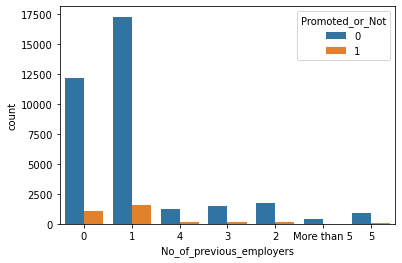

In [11]:
sns.countplot(x='No_of_previous_employers', hue='Promoted_or_Not', data= df_train)

In [12]:
#we will drop the rows with 'more than'  using conditional selection
df_train = df_train[df_train['No_of_previous_employers'] != 'More than 5']

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37911 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           37911 non-null  object 
 1   Division                             37911 non-null  object 
 2   Qualification                        37911 non-null  object 
 3   Gender                               37911 non-null  object 
 4   Channel_of_Recruitment               37911 non-null  object 
 5   Trainings_Attended                   37911 non-null  int64  
 6   Year_of_birth                        37911 non-null  int64  
 7   Last_performance_score               37911 non-null  float64
 8   Year_of_recruitment                  37911 non-null  int64  
 9   Targets_met                          37911 non-null  int64  
 10  Previous_Award                       37911 non-null  int64  
 11  Training_score_average      

In [14]:
#to have the dtype of the column as integer instead of object
df_train['No_of_previous_employers']= df_train['No_of_previous_employers'].astype('int')

In [15]:
df_train.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                 int32
Promoted_or_Not                          int64
dtype: object

<AxesSubplot:xlabel='count', ylabel='Division'>

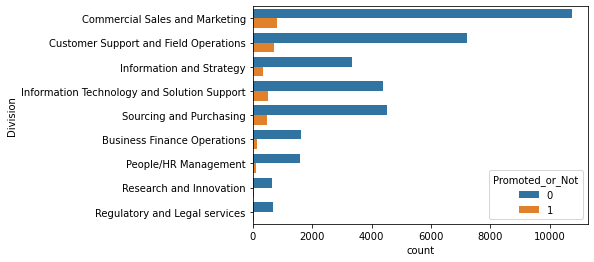

In [16]:
sns.countplot(y='Division', hue='Promoted_or_Not', data= df_train)

In [ ]:
#cat_cols= []
#for col in df_train.columns:
    #if df_train[col].dtype == 'object' and df_train[col].nunique()<10:
        #cat_cols.append(col)

In [ ]:
#cat_cols

In [17]:
categorical_cols = [col for col in df_train.columns
                    if df_train[col].dtype== 'object' and 
                    df_train[col].nunique()<10]
    


In [18]:
categorical_cols.remove('Qualification')
categorical_cols

['Division',
 'Gender',
 'Channel_of_Recruitment',
 'Foreign_schooled',
 'Marital_Status',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement']

In [19]:
df_train['Qualification'].value_counts()

First Degree or HND         26960
MSc, MBA and PhD            10368
Non-University Education      583
Name: Qualification, dtype: int64

In [20]:
def enc(col):
    if col == 'Non-University Education':
        return 0
    elif col == 'First Degree or HND':
        return 1
    else:
        return 2

In [21]:
df_train['Qualification']= df_train['Qualification'].apply(enc)
df_train['Qualification']

0        2
1        1
2        1
3        1
4        1
        ..
38307    1
38308    2
38309    1
38310    1
38311    1
Name: Qualification, Length: 37911, dtype: int64

In [22]:
data = pd.get_dummies(df_train, columns= categorical_cols, drop_first= True)
data

,EmployeeNo,Qualification,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,...,Division_Research and Innovation,Division_Sourcing and Purchasing,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_Yes
0,YAK/S/00001,2,2,1986,12.5,2011,1,0,41,ANAMBRA,...,0,0,0,1,0,0,0,0,0,0
1,YAK/S/00002,1,2,1991,12.5,2015,0,0,52,ANAMBRA,...,0,0,1,0,0,1,0,0,0,0
2,YAK/S/00003,1,2,1987,7.5,2012,0,0,42,KATSINA,...,0,0,1,1,0,1,0,0,0,0
3,YAK/S/00004,1,3,1982,2.5,2009,0,0,42,NIGER,...,0,0,1,0,0,1,0,1,0,0
4,YAK/S/00006,1,3,1990,7.5,2012,0,0,77,AKWA IBOM,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,YAK/S/54802,1,2,1990,0.0,2018,0,0,70,LAGOS,...,0,0,0,1,0,1,0,0,0,0
38308,YAK/S/54805,2,2,1984,5.0,2013,0,0,48,IMO,...,0,0,0,0,0,1,0,0,0,0
38309,YAK/S/54806,1,2,1994,12.5,2016,1,0,71,ANAMBRA,...,0,0,1,0,0,0,0,0,0,0
38310,YAK/S/54807,1,2,1992,2.5,2017,0,0,37,KWARA,...,0,0,1,1,0,1,0,0,0,0


In [23]:
data.drop(['EmployeeNo', 'State_Of_Origin'], axis=1, inplace= True)

In [24]:
data

,Qualification,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,No_of_previous_employers,Promoted_or_Not,...,Division_Research and Innovation,Division_Sourcing and Purchasing,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_Yes
0,2,2,1986,12.5,2011,1,0,41,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,2,1991,12.5,2015,0,0,52,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2,1987,7.5,2012,0,0,42,0,0,...,0,0,1,1,0,1,0,0,0,0
3,1,3,1982,2.5,2009,0,0,42,1,0,...,0,0,1,0,0,1,0,1,0,0
4,1,3,1990,7.5,2012,0,0,77,1,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,1,2,1990,0.0,2018,0,0,70,0,0,...,0,0,0,1,0,1,0,0,0,0
38308,2,2,1984,5.0,2013,0,0,48,1,0,...,0,0,0,0,0,1,0,0,0,0
38309,1,2,1994,12.5,2016,1,0,71,3,0,...,0,0,1,0,0,0,0,0,0,0
38310,1,2,1992,2.5,2017,0,0,37,1,0,...,0,0,1,1,0,1,0,0,0,0


<AxesSubplot:>

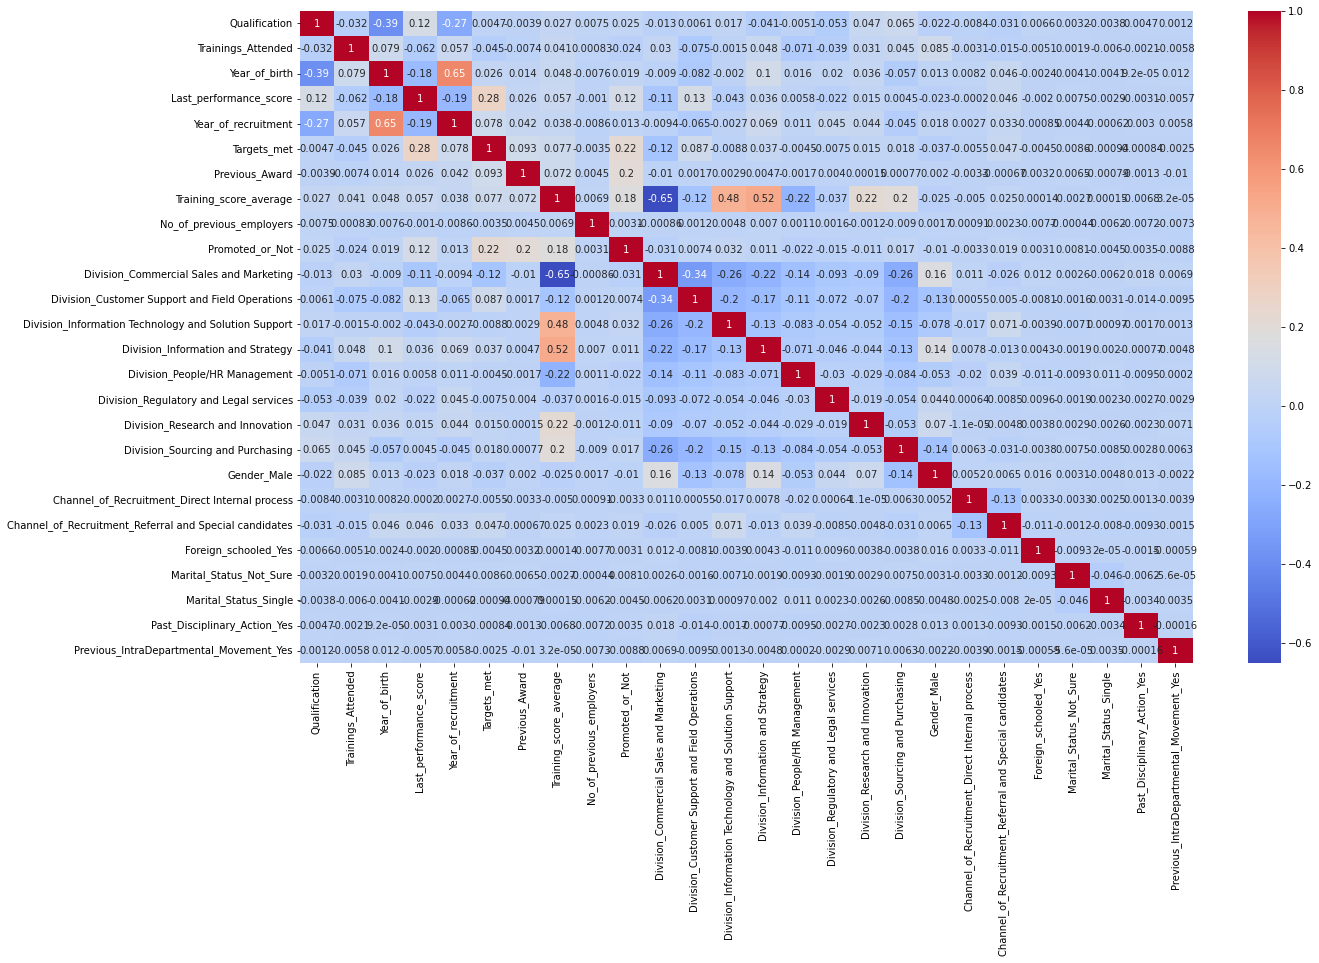

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37911 entries, 0 to 38311
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Qualification                                           37911 non-null  int64  
 1   Trainings_Attended                                      37911 non-null  int64  
 2   Year_of_birth                                           37911 non-null  int64  
 3   Last_performance_score                                  37911 non-null  float64
 4   Year_of_recruitment                                     37911 non-null  int64  
 5   Targets_met                                             37911 non-null  int64  
 6   Previous_Award                                          37911 non-null  int64  
 7   Training_score_average                                  37911 non-null  int64  
 8   No_of_previous_employers            

In [28]:
X= data[['Targets_met', 'Previous_Award', 'Training_score_average', 'Last_performance_score']]

In [29]:
y= data['Promoted_or_Not']

In [30]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
rfc.score(X_test, y_test)

0.9261473536135045

In [33]:
rfc.score(X_train, y_train)

0.9284395372498775

In [34]:
y_pred = rfc.predict(X_test)

In [35]:
print(f1_score(y_test, y_pred))

0.2644483362521891


In [36]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10453
           1       0.68      0.16      0.26       921

    accuracy                           0.93     11374
   macro avg       0.81      0.58      0.61     11374
weighted avg       0.91      0.93      0.90     11374



In [41]:
conda install -c conda-forge shap

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




In [42]:
import shap

In [44]:
explainer = shap.TreeExplainer(rfc, X_train, feature_names = X.columns)

In [45]:
base_value = explainer.expected_value[1]

In [46]:
explainer.shap_values(X_train)[1]

100%|===================| 53072/53074 [14:16<00:00]        

array([[-0.03256778, -0.02134748,  0.04006503, -0.01520883],
       [ 0.03290617, -0.01136729, -0.08781892, -0.03346864],
       [-0.0226625 , -0.01127665,  0.03659046, -0.03826147],
       ...,
       [ 0.05639256, -0.00351122,  0.00528406, -0.03183306],
       [-0.04541875, -0.01879109, -0.02142414, -0.00149607],
       [-0.03207295, -0.02187611,  0.05071698, -0.04542292]])

In [52]:
shap_values = explainer.shap_values(X_train)[1]

100%|===================| 53037/53074 [14:23<00:00]        

In [55]:
X_train

,Targets_met,Previous_Award,Training_score_average,Last_performance_score
5068,0,0,78,7.5
2498,1,0,60,0.0
30246,0,0,62,7.5
33392,1,0,68,12.5
9750,1,0,54,7.5
...,...,...,...,...
17022,0,0,40,2.5
6338,0,0,48,2.5
11400,1,0,73,7.5
866,0,0,50,7.5


In [50]:
shap.initjs()

In [56]:
shap.force_plot(base_value, shap_values[-4], X_train.iloc[-4], X.columns)

## SUMMARY_PLOT

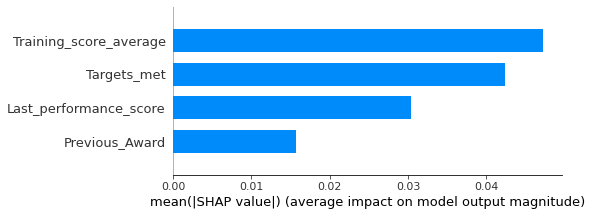

In [57]:
shap.summary_plot(shap_values, X_train, X.columns, plot_type = 'bar')

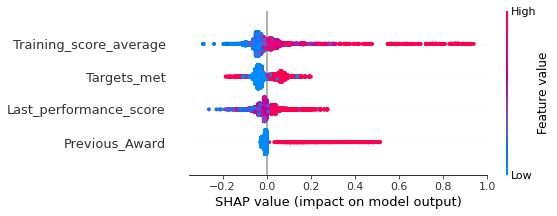

In [58]:
shap.summary_plot(shap_values, X_train, X.columns)

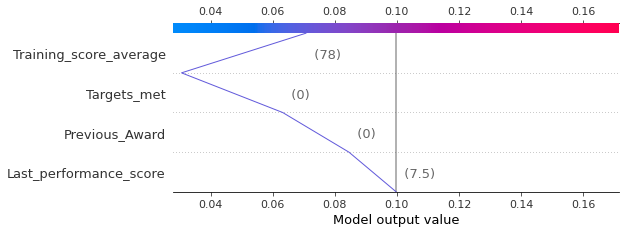

In [59]:
shap.decision_plot(base_value, shap_values[0], X_train.iloc[0], list(X.columns))

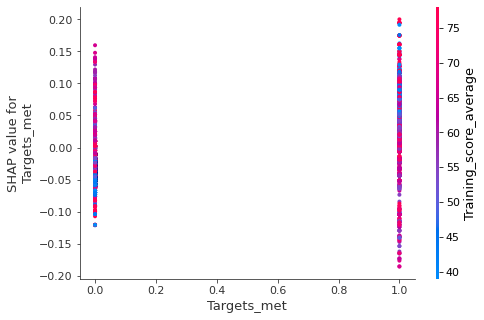

In [61]:
shap.dependence_plot(ind = 'Targets_met', shap_values = shap_values, features = X_train, feature_names = X.columns)

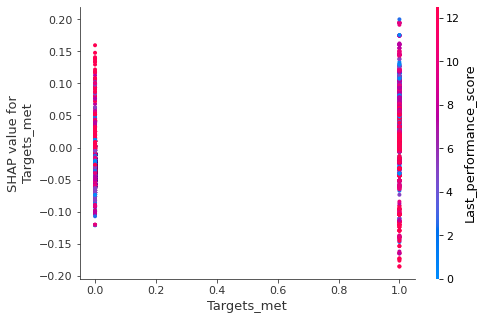

In [64]:
shap.dependence_plot(ind = 'Targets_met', shap_values = shap_values, features = X_train, feature_names = X.columns, interaction_index = "Last_performance_score")

In [37]:
    r_model= RandomForestClassifier()
    #x_model= XGBClassifier()

In [38]:
def model_predict(model, X_train=X_train, y_train=y_train, X_test=X_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return pred

In [39]:
def model_pred(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_sc = f1_score(y_test, pred)
    class_report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    return pred, f1_sc, class_report, conf_matrix

In [ ]:
x_pred= model_pred(x_model)

In [ ]:
print(x_pred[2])

In [ ]:
r_pred= model_pred(r_model)

In [ ]:
print(r_pred[2])